In [1]:
import pandas as pd
import functools
import numpy as np
from tqdm import tqdm
import os
from multiprocessing.pool import Pool
from scipy import stats
import seaborn as sns


In [2]:
submission_file = 'data/final_submission_borda.csv'
percent_limit   = 0.8
submission_size = 10

In [3]:
df_item = pd.read_csv("/media/workspace/triplet_session/output/mercado_livre/dataset/item__processed.csv", usecols=["item_id", "domain_id", "domain_idx"])#.head(10)
df_item.head()

,domain_id,item_id,domain_idx
0,MLM-INDIVIDUAL_HOUSES_FOR_SALE,111260,6107
1,MLM-VIDEO_GAMES,871377,7754
2,MLM-SKIRTS,490232,7275
3,MLM-GRAPHICS_CARDS,1150706,5892
4,MLM-NOTEBOOKS,934912,6707


In [4]:
domain_map = df_item[['item_id', 'domain_idx']].set_index("item_id").to_dict()["domain_idx"]
#domain_map

In [5]:
df_sub = pd.read_csv(submission_file, header=None)
df_sub.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1615991,919498,652718,2095678,473325,1154325,1208667,63024,400496,87559,...,849156,1645101,10957,1328958,341077,1177535,1275362,977127,1715614,2053354
1,228737,1230986,1341158,855886,864577,978270,1997785,1077336,1880554,1148280,...,678247,1355767,1144096,166596,1696495,1627381,1206131,710712,1355106,1812426
2,10243,1459575,17827,290755,358952,777316,1716388,1314932,877640,1332849,...,660825,1154325,151458,1130531,678444,2047219,1763567,1013008,1371799,1805356
3,1587422,1439187,849156,1864599,457681,1767506,725371,1775650,1207169,175411,...,563256,255638,1635518,762780,842438,2053790,151458,1787501,914466,795217
4,86082,928548,2049207,1920677,1172027,129029,573757,1039554,1587422,99044,...,236078,1679078,1436844,251255,140082,1448561,1034065,478088,488175,1223146


In [6]:
df_sub.values

array([[1615991,  919498,  652718, ...,  977127, 1715614, 2053354],
       [ 228737, 1230986, 1341158, ...,  710712, 1355106, 1812426],
       [  10243, 1459575,   17827, ..., 1013008, 1371799, 1805356],
       ...,
       [1459575, 1984730, 1158631, ...,  882697, 1680032, 2004377],
       [ 617673,  852053, 1786453, ...,  501711,   70527,  365389],
       [ 429798,  716822, 1748431, ..., 1483688, 1523526,  998284]])

In [7]:
def _get_domain(arr, domain_map):
    return list(map(domain_map.get, arr))
    
with Pool(os.cpu_count()) as p:
    _map_domain = list(tqdm(
        p.map(functools.partial(_get_domain, domain_map=domain_map), df_sub.values),
        total=len(df_sub.values),
    ))  
    
_map_domain    

100%|██████████| 1000/1000 [00:00<00:00, 1375181.64it/s]


[[3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  2027,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3584,
  2027,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  2018,
  3513,
  3513,
  2027,
  2027,
  3584,
  3584,
  3513,
  3513,
  3584,
  3513,
  3513,
  3513,
  3513,
  3513,
  3513,
  2023,
  3581,
  3513,
  4195,
  6114,
  3513,
  5989,
  48,
  1781,
  3513,
  3513,
  3513,
  410,
  5989,
  3584,
  2110,
  3658,
  3513,
  3513,
  2027,
  160,
  3147,
  2015,
  3661,
  2572,
  3556,
  2027,
  3682],
 [2587,
  2587,
  2587,
  2587,
  2587,
  2694,
  360,
  3109,
  678,
  1370,
  3472,
  680,
  2424,
  3556,
  2891,
  3544,
  3500,
  3208,
  4220,
  536,
  2027,
  1423,
  2402,
  2156,
  3887,
  1780,

In [8]:
def _get_moda(arr):
    return stats.mode(arr[:10])[0][0]

def _get_count_moda(arr):
    return stats.mode(arr[:10])[1][0]/len(arr[:10])

In [9]:
arr_moda = list(zip(list(df_sub.values), list(_map_domain),  
                    list(map(_get_moda, _map_domain)), 
                    list(map(_get_count_moda, _map_domain))))
#arr_moda

In [10]:
df_moda = pd.DataFrame(arr_moda, columns=["reclist", "domainlist", "domain_moda", "count"])
df_moda.head()

,reclist,domainlist,domain_moda,count
0,"[1615991, 919498, 652718, 2095678, 473325, 115...","[3513, 3513, 3513, 3513, 3513, 3513, 3513, 351...",3513,1.0
1,"[228737, 1230986, 1341158, 855886, 864577, 978...","[2587, 2587, 2587, 2587, 2587, 2694, 360, 3109...",2587,0.5
2,"[10243, 1459575, 17827, 290755, 358952, 777316...","[1338, 3776, 815, 815, 2483, 3524, 3776, 3957,...",815,0.2
3,"[1587422, 1439187, 849156, 1864599, 457681, 17...","[2027, 2015, 3513, 2015, 2015, 6113, 3513, 201...",2015,0.3
4,"[86082, 928548, 2049207, 1920677, 1172027, 129...","[2027, 2027, 3513, 2027, 2027, 2027, 2027, 202...",2027,0.9


In [11]:
def _create_relevance_list(sorted_actions, expected_action):
    s = []
    for i in range(len(sorted_actions)):
        if str(sorted_actions[i]) == str(expected_action):
            s.append(i + 0)
        else:
            s.append(i + 100)
    return s
    #return [0 if str(action) == str(expected_action) else 1 for action in sorted_actions]

df_moda['relevance_list'] = df_moda.apply(lambda row: 
                                          _create_relevance_list(row['domainlist'], row['domain_moda']),  
                                          axis=1)

In [12]:
df_moda.head()

,reclist,domainlist,domain_moda,count,relevance_list
0,"[1615991, 919498, 652718, 2095678, 473325, 115...","[3513, 3513, 3513, 3513, 3513, 3513, 3513, 351...",3513,1.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[228737, 1230986, 1341158, 855886, 864577, 978...","[2587, 2587, 2587, 2587, 2587, 2694, 360, 3109...",2587,0.5,"[0, 1, 2, 3, 4, 105, 106, 107, 108, 109, 110, ..."
2,"[10243, 1459575, 17827, 290755, 358952, 777316...","[1338, 3776, 815, 815, 2483, 3524, 3776, 3957,...",815,0.2,"[100, 101, 2, 3, 104, 105, 106, 107, 108, 109,..."
3,"[1587422, 1439187, 849156, 1864599, 457681, 17...","[2027, 2015, 3513, 2015, 2015, 6113, 3513, 201...",2015,0.3,"[100, 1, 102, 3, 4, 105, 106, 107, 108, 109, 1..."
4,"[86082, 928548, 2049207, 1920677, 1172027, 129...","[2027, 2027, 3513, 2027, 2027, 2027, 2027, 202...",2027,0.9,"[0, 1, 102, 3, 4, 5, 6, 7, 8, 9, 110, 111, 12,..."


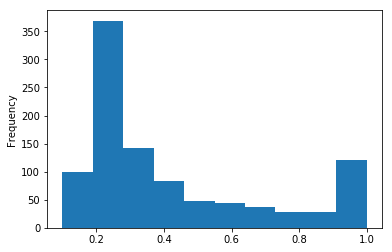

In [13]:
df_moda['count'].plot(kind='hist')

In [14]:
def _sorte_by_domain_moda(reclist, relevance_list, percent, limit):
    if percent >= limit:
        return [x for _,x in sorted(zip(relevance_list, reclist), reverse=False)]
    else:
        return reclist
    
df_moda['reclist_2'] = df_moda.apply(lambda row: _sorte_by_domain_moda(
                                                row['reclist'], 
                                                row['relevance_list'], 
                                                row['count'], percent_limit)[:submission_size],  axis=1)    
df_moda['domainlist_2'] = df_moda.apply(lambda row: _sorte_by_domain_moda(
                                                row['domainlist'], 
                                                row['relevance_list'], 
                                                row['count'], percent_limit)[:submission_size],  axis=1)  

In [15]:
df_moda.head()

,reclist,domainlist,domain_moda,count,relevance_list,reclist_2,domainlist_2
0,"[1615991, 919498, 652718, 2095678, 473325, 115...","[3513, 3513, 3513, 3513, 3513, 3513, 3513, 351...",3513,1.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1615991, 919498, 652718, 2095678, 473325, 115...","[3513, 3513, 3513, 3513, 3513, 3513, 3513, 351..."
1,"[228737, 1230986, 1341158, 855886, 864577, 978...","[2587, 2587, 2587, 2587, 2587, 2694, 360, 3109...",2587,0.5,"[0, 1, 2, 3, 4, 105, 106, 107, 108, 109, 110, ...","[228737, 1230986, 1341158, 855886, 864577, 978...","[2587, 2587, 2587, 2587, 2587, 2694, 360, 3109..."
2,"[10243, 1459575, 17827, 290755, 358952, 777316...","[1338, 3776, 815, 815, 2483, 3524, 3776, 3957,...",815,0.2,"[100, 101, 2, 3, 104, 105, 106, 107, 108, 109,...","[10243, 1459575, 17827, 290755, 358952, 777316...","[1338, 3776, 815, 815, 2483, 3524, 3776, 3957,..."
3,"[1587422, 1439187, 849156, 1864599, 457681, 17...","[2027, 2015, 3513, 2015, 2015, 6113, 3513, 201...",2015,0.3,"[100, 1, 102, 3, 4, 105, 106, 107, 108, 109, 1...","[1587422, 1439187, 849156, 1864599, 457681, 17...","[2027, 2015, 3513, 2015, 2015, 6113, 3513, 201..."
4,"[86082, 928548, 2049207, 1920677, 1172027, 129...","[2027, 2027, 3513, 2027, 2027, 2027, 2027, 202...",2027,0.9,"[0, 1, 102, 3, 4, 5, 6, 7, 8, 9, 110, 111, 12,...","[86082, 928548, 1920677, 1172027, 129029, 5737...","[2027, 2027, 2027, 2027, 2027, 2027, 2027, 202..."


In [16]:
df_moda.iloc[2]

reclist           [10243, 1459575, 17827, 290755, 358952, 777316...
domainlist        [1338, 3776, 815, 815, 2483, 3524, 3776, 3957,...
domain_moda                                                     815
count                                                           0.2
relevance_list    [100, 101, 2, 3, 104, 105, 106, 107, 108, 109,...
reclist_2         [10243, 1459575, 17827, 290755, 358952, 777316...
domainlist_2      [1338, 3776, 815, 815, 2483, 3524, 3776, 3957,...
Name: 2, dtype: object

In [17]:
df_moda.iloc[2].reclist

array([  10243, 1459575,   17827,  290755,  358952,  777316, 1716388,
       1314932,  877640, 1332849,  553704, 1158631, 1251384,  548905,
       1082484, 1081082, 1880554, 1803710,  301390, 1906937,  175411,
        875255,  158235,  548958,   24513,  956488,  268262, 1984730,
       1587422,  601951,  944825, 1843848,  914466, 1361154, 1933585,
       1328958, 1586210, 1056539,  768694, 1015200,  790888, 1087305,
       1978430, 1007340, 2065207,  829851, 1382218,  210375, 2053790,
         75833,  206201, 1244853,  830693, 1094202, 2004377,  499269,
       1748830,  457123,  476890,  504143, 1647194, 2032612, 1195938,
       1785755,  856245, 1645101, 1352628,  967194,  671264, 1680032,
       1567597, 2066646, 1379001,  824954,  683208,  786725, 1845592,
       1248475, 1673619,  747967,  795772, 1842210, 1806163, 1368729,
        939065, 2041622, 1844503, 1157295, 1607924,  231634,  660825,
       1154325,  151458, 1130531,  678444, 2047219, 1763567, 1013008,
       1371799, 1805

In [18]:
#df_moda.iloc[2].domainlist

In [19]:
reranked_list = list(df_moda.reclist_2.values)
np.savetxt('data/final_submission_domain_{}.csv'.format(percent_limit), reranked_list, fmt='%i', delimiter=',') 